In [ ]:

############################ Pytorch Implementation ###############################################
#Training is done in  the notebook as well as inference towards the end
#I have created multiple models which are tested in different epochs and their varrying performence
#To change the model encoder and decoder simply load the appropriate decoder-num_epoch.pkl file
#Lot more traingin is required to get accurate predictions like more then 3 epochs
#the predictions as of right now are somewhat accurate
#Epoch [3/3], Loss: 2.2159, Perplexity: 9.1694 --> so requires more training with different hyper parameters


In [1]:
import os
from collections import defaultdict
import numpy as np
import PIL
from matplotlib import pyplot as plt

import pandas as pd
%matplotlib inline


from PIL import Image



In [2]:
dataframe = pd.read_csv('E:\DeepLearning with pytorch/HW3/captions.txt')

myDir = 'E:\DeepLearning with pytorch/HW3/captions.txt'

In [3]:
dataframe
len(dataframe)

40455

In [4]:
df = dataframe.groupby('image', as_index=False).agg(lambda x: x.tolist())

In [5]:
df['image']

0       1000268201_693b08cb0e.jpg
1       1001773457_577c3a7d70.jpg
2       1002674143_1b742ab4b8.jpg
3       1003163366_44323f5815.jpg
4       1007129816_e794419615.jpg
                  ...            
8086     990890291_afc72be141.jpg
8087      99171998_7cc800ceef.jpg
8088      99679241_adc853a5c0.jpg
8089     997338199_7343367d7f.jpg
8090     997722733_0cb5439472.jpg
Name: image, Length: 8091, dtype: object

In [6]:
imagePath = []
myDir = 'E:\DeepLearning with pytorch/HW3/'
for i in range(len(df)):
    path = myDir + 'Images/' + str(df['image'].iloc[i])
    imagePath.append(path)

In [7]:
len(imagePath)

8091

In [8]:
df['image_path'] = imagePath

In [9]:
df.head(4)

,image,caption,image_path
0,1000268201_693b08cb0e.jpg,[A child in a pink dress is climbing up a set ...,E:\DeepLearning with pytorch/HW3/Images/100026...
1,1001773457_577c3a7d70.jpg,"[A black dog and a spotted dog are fighting, A...",E:\DeepLearning with pytorch/HW3/Images/100177...
2,1002674143_1b742ab4b8.jpg,[A little girl covered in paint sits in front ...,E:\DeepLearning with pytorch/HW3/Images/100267...
3,1003163366_44323f5815.jpg,[A man lays on a bench while his dog sits by h...,E:\DeepLearning with pytorch/HW3/Images/100316...


In [10]:
df['image_path'].iloc[0]

'E:\\DeepLearning with pytorch/HW3/Images/1000268201_693b08cb0e.jpg'

In [11]:
df['image'].iloc[0]

'1000268201_693b08cb0e.jpg'

In [12]:
word2idx = {}
idx2word = {}
idx = 3

for i in range(len(df)):
    captions = df['caption'].iloc[i]
    #print(captions)
    for k in range(len(captions)):
        for j in captions[k].split(' '):
            if j != '.':
                if not j in word2idx:
                    word2idx[j] = idx
                    idx2word[idx] = j
                    idx += 1




In [13]:
def convertToidx(word2idx, idx2word, captions):
    #print(captions)
    converted = []
    
    for i in captions:
        cap = []
        cap.append(1)
        for j in i.split():
            if j != '.':
                cap.append(word2idx[j])
        cap.append(0)
        converted.append(cap)
        #print(cap)
    
    #print(cap)
    #print(converted)
    return converted


all_captions = []
for i in range(len(df['caption'])):
    captions = df['caption'].iloc[i]
    #print(captions)
    
    converted = convertToidx(word2idx, idx2word, captions)
    all_captions.append(converted)
    
    #print(converted)
    
#print(all_captions)
df['converted_all_captions'] = all_captions

In [14]:
len(word2idx)

9629

In [15]:
print(df['converted_all_captions'].iloc[0])

print()
print(df['caption'].iloc[0])

[[1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 6, 12, 13, 14, 5, 15, 16, 17, 0], [1, 3, 18, 19, 20, 6, 21, 22, 0], [1, 3, 23, 18, 10, 20, 6, 21, 24, 0], [1, 3, 23, 18, 10, 25, 14, 26, 27, 24, 0], [1, 3, 23, 18, 5, 6, 7, 8, 19, 20, 6, 21, 28, 0]]

['A child in a pink dress is climbing up a set of stairs in an entry way .', 'A girl going into a wooden building .', 'A little girl climbing into a wooden playhouse .', 'A little girl climbing the stairs to her playhouse .', 'A little girl in a pink dress going into a wooden cabin .']


In [16]:
train, validate, test = np.split(df.sample(frac=1, random_state=42), [int(.6*len(df)), int(.8*len(df))])

In [17]:
len(validate)

1618

In [18]:
len(test)

1619

In [19]:
len(train)

4854

In [20]:
train

,image,caption,image_path,converted_all_captions
4194,3139895886_5a6d495b13.jpg,"[A black-and-white dog bounds off the ground ,...",E:\DeepLearning with pytorch/HW3/Images/313989...,"[[1, 3, 4500, 30, 2374, 146, 25, 95, 138, 815,..."
4166,3133825703_359a0c414d.jpg,"[A child staring at Santa ., A father and son ...",E:\DeepLearning with pytorch/HW3/Images/313382...,"[[1, 3, 4, 45, 46, 3574, 0], [1, 3, 1949, 31, ..."
1928,244910177_7c4ec3f65b.jpg,[Three woman walk down a city street and one h...,E:\DeepLearning with pytorch/HW3/Images/244910...,"[[1, 365, 244, 1103, 407, 6, 157, 47, 31, 151,..."
1061,2127207912_9298824e66.jpg,"[The two people are standing on a rock , holdi...",E:\DeepLearning with pytorch/HW3/Images/212720...,"[[1, 108, 306, 206, 33, 149, 40, 6, 172, 138, ..."
736,1810651611_35aae644fb.jpg,"[A closeup of a little girl on a swing ., A li...",E:\DeepLearning with pytorch/HW3/Images/181065...,"[[1, 3, 650, 13, 6, 23, 18, 40, 6, 1232, 0], [..."
...,...,...,...,...
1898,2443512473_6f5a22eb42.jpg,[A black and white agility dog weaving between...,E:\DeepLearning with pytorch/HW3/Images/244351...,"[[1, 3, 29, 31, 42, 1995, 30, 4717, 555, 1618,..."
5120,3335501468_628655d608.jpg,"[A bird is flapping its wings on the water ., ...",E:\DeepLearning with pytorch/HW3/Images/333550...,"[[1, 3, 883, 9, 5718, 135, 1567, 40, 25, 147, ..."
258,1296412797_85b6d2f8d6.jpg,[A child is being swung by her arms while anot...,E:\DeepLearning with pytorch/HW3/Images/129641...,"[[1, 3, 4, 9, 260, 1532, 82, 27, 530, 80, 193,..."
2924,278105206_df987b0ca0.jpg,[a balck and tan dog running through the snow ...,E:\DeepLearning with pytorch/HW3/Images/278105...,"[[1, 6, 4428, 31, 294, 30, 121, 126, 25, 185, ..."


In [21]:
train['caption'].iloc[0]

['A black-and-white dog bounds off the ground , all feet in the air , of a yellow field .',
 'A black and white dog is jumping over high yellow grass .',
 'A black and white dog is jumping through a field of brown grass .',
 'a dog runs through the dry grass .',
 'The black and white dog runs through the field .']

In [22]:
train['converted_all_captions'].iloc[0]

[[1,
  3,
  4500,
  30,
  2374,
  146,
  25,
  95,
  138,
  815,
  143,
  5,
  25,
  237,
  138,
  13,
  6,
  232,
  186,
  0],
 [1, 3, 29, 31, 42, 30, 9, 182, 174, 514, 232, 67, 0],
 [1, 3, 29, 31, 42, 30, 9, 182, 126, 6, 186, 13, 43, 67, 0],
 [1, 6, 30, 132, 126, 25, 751, 67, 0],
 [1, 108, 29, 31, 42, 30, 132, 126, 25, 186, 0]]

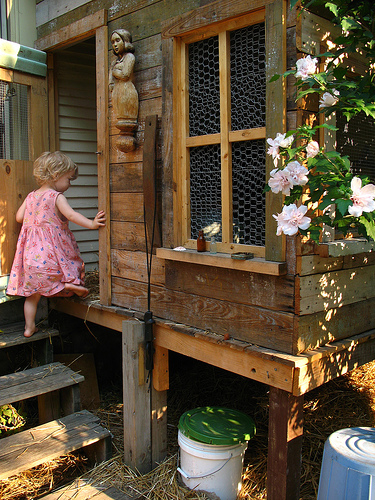

In [23]:
image = Image.open(df['image_path'].iloc[0])
display(image)

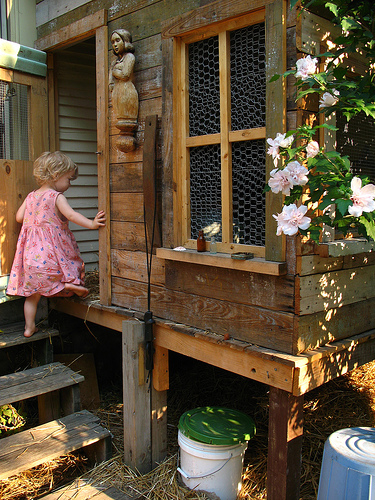

5


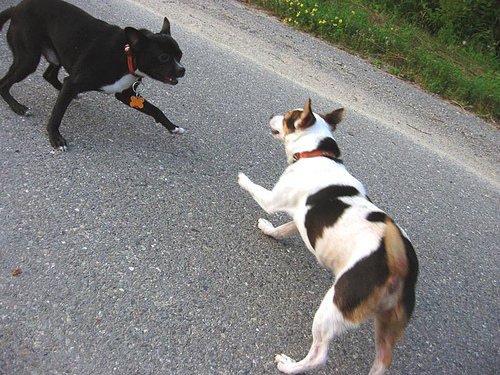

5


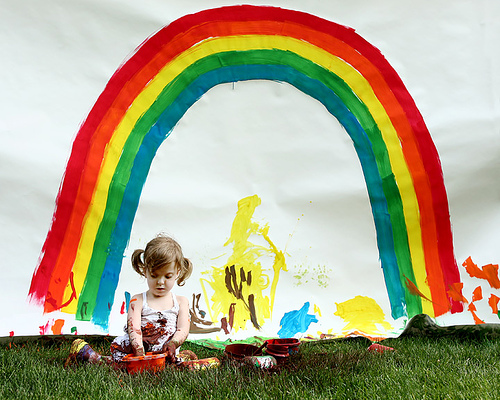

5


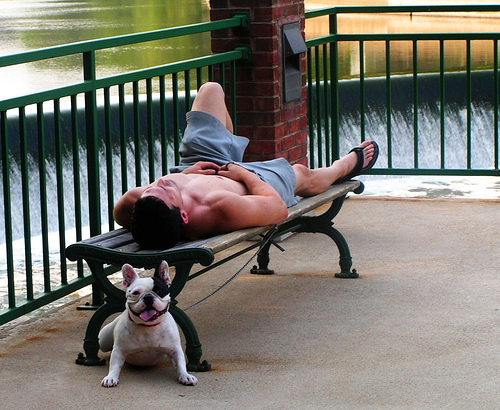

5


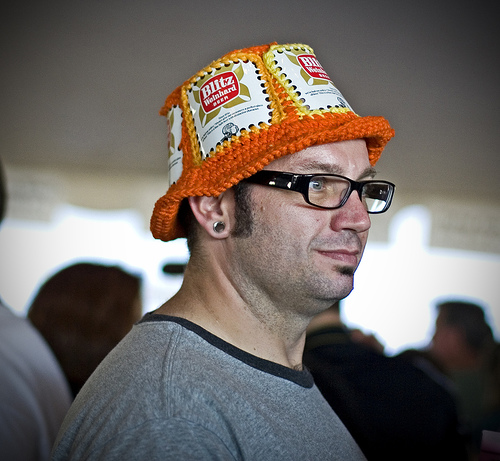

5


In [24]:
def show_captions(image_path, caption):
    image = Image.open(image_path)
    img = np.asarray(image)
    #print(img.shape)
    display(image)
    print(len(caption))
    
for i in range(5):
    show_captions(df['image_path'].iloc[i], df['caption'].iloc[i])

In [25]:
df

,image,caption,image_path,converted_all_captions
0,1000268201_693b08cb0e.jpg,[A child in a pink dress is climbing up a set ...,E:\DeepLearning with pytorch/HW3/Images/100026...,"[[1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 6, 12, 13, 1..."
1,1001773457_577c3a7d70.jpg,"[A black dog and a spotted dog are fighting, A...",E:\DeepLearning with pytorch/HW3/Images/100177...,"[[1, 3, 29, 30, 31, 6, 32, 30, 33, 34, 0], [1,..."
2,1002674143_1b742ab4b8.jpg,[A little girl covered in paint sits in front ...,E:\DeepLearning with pytorch/HW3/Images/100267...,"[[1, 3, 23, 18, 56, 5, 57, 58, 5, 59, 13, 6, 6..."
3,1003163366_44323f5815.jpg,[A man lays on a bench while his dog sits by h...,E:\DeepLearning with pytorch/HW3/Images/100316...,"[[1, 3, 77, 78, 40, 6, 79, 80, 81, 30, 58, 82,..."
4,1007129816_e794419615.jpg,[A man in an orange hat starring at something ...,E:\DeepLearning with pytorch/HW3/Images/100712...,"[[1, 3, 77, 5, 15, 96, 97, 98, 46, 99, 0], [1,..."
...,...,...,...,...
8086,990890291_afc72be141.jpg,[A man does a wheelie on his bicycle on the si...,E:\DeepLearning with pytorch/HW3/Images/990890...,"[[1, 3, 77, 898, 6, 2474, 40, 81, 578, 40, 25,..."
8087,99171998_7cc800ceef.jpg,"[A group is sitting around a snowy crevasse .,...",E:\DeepLearning with pytorch/HW3/Images/991719...,"[[1, 3, 205, 9, 64, 252, 6, 363, 5082, 0], [1,..."
8088,99679241_adc853a5c0.jpg,[A grey bird stands majestically on a beach wh...,E:\DeepLearning with pytorch/HW3/Images/996792...,"[[1, 3, 176, 883, 144, 9629, 40, 6, 141, 80, 2..."
8089,997338199_7343367d7f.jpg,"[A person stands near golden walls ., a woman ...",E:\DeepLearning with pytorch/HW3/Images/997338...,"[[1, 3, 195, 144, 133, 724, 4370, 0], [1, 6, 2..."


In [26]:
#!pip install opencv-python

In [27]:
for i in train['converted_all_captions'].iloc[1]:
    if len(i) != 20:
        #print(i)
        if len(i) >= 20:
            #print(i)
            sample_caption = i[0:19].copy()
            
            sample_caption.append(0)
            sample_caption = torch.Tensor(sample_caption).long()
            caps.append(sample_caption)
            #print(sample_caption)
            
        elif len(i) < 20:
            left = 20 - len(i)
            x = i.copy()
            x.pop(-1)
            for k in range(left):
                x.append(2)
            x.append(0)
            #print(x)

In [28]:
import cv2
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms

import torch

class ImageCaptionDataset(Dataset):
    """8k dataset."""

    def __init__(self, df, transform=None):

        self.df = df
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):   
        img = self.df['image_path'].iloc[idx]
        #image = Image.open(img)
        
        #image = np.asarray(image)
        
        img = cv2.imread(img)
        res = cv2.resize(img, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
        
        caption = self.df['converted_all_captions'].iloc[idx]
        
        #print(caption)
        caps = []
        for i in self.df['converted_all_captions'].iloc[idx]:
            if len(i) != 20:
                if len(i) >= 20:
                    sample_caption = i[0:19].copy()
                    sample_caption.append(0)
                    #sample_caption = torch.Tensor(sample_caption).long()
                    caps.append(sample_caption)
                    #print(sample_caption)
            
                elif len(i) <= 20:
                    left = 20 - len(i)
                    x = i.copy()
                    x.pop(-1)
                    for k in range(left):
                        x.append(2)
                    x.append(0)
                    #x = torch.Tensor(x).long()
                    caps.append(x)
                    
            elif len(i) == 20:
                caps.append(i)
                #caps.append(torch.Tensor(i).long())
        
        caps = np.asarray(caps)

        #print(type(caps))
        caps = torch.from_numpy(caps)
        
        img = torch.from_numpy(res.transpose((2, 1, 0)))
        
        sample = {'image': img, 'caption': caps[1]}
        
        return sample
            


E:\Anaconda3\envs\pytorch\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: [WinError 126] The specified module could not be found
  warn(f"Failed to load image Python extension: {e}")


In [29]:
train_Dataset = ImageCaptionDataset(train)
train_loader = torch.utils.data.DataLoader(train_Dataset, 
                                           batch_size=64,
                                           shuffle=True, 
                                           num_workers=0,
                                           drop_last=True)


In [30]:
len(train_loader)

75

In [91]:
test_Dataset = ImageCaptionDataset(test)
test_loader = torch.utils.data.DataLoader(test_Dataset, 
                                           batch_size=1,
                                           shuffle=True, 
                                           num_workers=0,
                                           drop_last=True)
            

In [92]:
num_to_display = 10

for i in range(num_to_display):
    
    rand_i = np.random.randint(0, len(test_Dataset))
    
    sample = train_Dataset[rand_i]
    
    print(i, sample['image'].size(), sample['caption'].size()) 


0 torch.Size([3, 224, 224]) torch.Size([20])
1 torch.Size([3, 224, 224]) torch.Size([20])
2 torch.Size([3, 224, 224]) torch.Size([20])
3 torch.Size([3, 224, 224]) torch.Size([20])
4 torch.Size([3, 224, 224]) torch.Size([20])
5 torch.Size([3, 224, 224]) torch.Size([20])
6 torch.Size([3, 224, 224]) torch.Size([20])
7 torch.Size([3, 224, 224]) torch.Size([20])
8 torch.Size([3, 224, 224]) torch.Size([20])
9 torch.Size([3, 224, 224]) torch.Size([20])


In [93]:
num_to_display = 10

for i in range(num_to_display):
    
    rand_i = np.random.randint(0, len(train_Dataset))
    
    sample = train_Dataset[rand_i]
    
    print(i, sample['image'].size(), sample['caption'].size()) 


0 torch.Size([3, 224, 224]) torch.Size([20])
1 torch.Size([3, 224, 224]) torch.Size([20])
2 torch.Size([3, 224, 224]) torch.Size([20])
3 torch.Size([3, 224, 224]) torch.Size([20])
4 torch.Size([3, 224, 224]) torch.Size([20])
5 torch.Size([3, 224, 224]) torch.Size([20])
6 torch.Size([3, 224, 224]) torch.Size([20])
7 torch.Size([3, 224, 224]) torch.Size([20])
8 torch.Size([3, 224, 224]) torch.Size([20])
9 torch.Size([3, 224, 224]) torch.Size([20])


In [94]:
print('Number of images: ', len(train))

# make sure the sample tensors are the expected size
for i in range(9):
    sample = train_Dataset[i]
    print(sample['image'].size())
    #print(sample['image'])
    print(sample['caption'])
    print()

Number of images:  4854
torch.Size([3, 224, 224])
tensor([  1,   3,  29,  31,  42,  30,   9, 182, 174, 514, 232,  67,   2,   2,
          2,   2,   2,   2,   2,   0], dtype=torch.int32)

torch.Size([3, 224, 224])
tensor([   1,    3, 1949,   31, 2170,   52,   46,    6, 1715,   52, 3574,    2,
           2,    2,    2,    2,    2,    2,    2,    0], dtype=torch.int32)

torch.Size([3, 224, 224])
tensor([   1,  365,  954,  138,  306,   37, 2162,  138,  163,  407,   25,   47,
           2,    2,    2,    2,    2,    2,    2,    0], dtype=torch.int32)

torch.Size([3, 224, 224])
tensor([  1, 365, 206, 623, 267,  17, 126, 507, 560,   2,   2,   2,   2,   2,
          2,   2,   2,   2,   2,   0], dtype=torch.int32)

torch.Size([3, 224, 224])
tensor([   1,    3,   23,   18,    5,    6,    8,   37,    7, 1177, 1234,   40,
           6, 2863, 1232,    2,    2,    2,    2,    0], dtype=torch.int32)

torch.Size([3, 224, 224])
tensor([   1,    6,  153, 2817,  147,   40,  193,  153,    2,    2,    2,  

In [95]:
#train_loader = torch.utils.data.DataLoader(train_Dataset, 
#                                           batch_size=32,
#                                           shuffle=True, 
#                                           num_workers=0,
#                                           drop_last=True)


In [96]:
len(train_loader)

76

In [97]:
import torch
import torch.nn as nn
import torchvision.models as models


class EncoderCNN(nn.Module):
    def __init__(self, embed_size):
        super(EncoderCNN, self).__init__()
        resnet = models.resnet50(pretrained=True)
        for param in resnet.parameters():
            param.requires_grad_(False)
        
        modules = list(resnet.children())[:-1]
        self.resnet = nn.Sequential(*modules)
        self.embed = nn.Linear(resnet.fc.in_features, embed_size)

    def forward(self, images):
        features = self.resnet(images)
        features = features.view(features.size(0), -1)
        features = self.embed(features)
        return features
    

class DecoderRNN(nn.Module):
    def __init__(self, embed_size, hidden_size, vocab_size, num_layers=1):
        
        super(DecoderRNN, self).__init__()
        
        self.hidden_size = hidden_size
        self.embed_size = embed_size
        self.vocab_size = vocab_size
        self.num_layers = num_layers
        
        self.word_embeddings = nn.Embedding(vocab_size, embed_size)
        
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers, batch_first = True)
        
        self.fc = nn.Linear(hidden_size, vocab_size)
        
        

    
    def forward(self, features, captions):
        
        batch_size = features.shape[0]
        
        self.hidden = self.init_hidden(batch_size)     
        
        embedded = self.word_embeddings(captions[:,:-1])

        embedded = torch.cat((features.unsqueeze(1), embedded), dim=1)

        lstm_out, self.hidden = self.lstm(embedded)
        
        output = self.fc(lstm_out)
            
        return output
    
    def init_hidden(self, batch_size):
        ''' At the start of training, we need to initialize a hidden state;
           there will be none because the hidden state is formed based on perviously seen data.
           So, this function defines a hidden state with all zeroes and of a specified size.'''
        # The axes dimensions are (n_layers, batch_size, hidden_dim)
        return (torch.zeros(self.num_layers, batch_size, self.hidden_size),
                torch.zeros(self.num_layers, batch_size, self.hidden_size))


    def sample(self, inputs, states=None, max_len=20):
        " accepts pre-processed image tensor (inputs) and returns predicted sentence (list of tensor ids of length max_len) "
        sampled_ids = []
        for i in range(max_len):                                    # maximum sampling length
            lstm_out, states = self.lstm(inputs, states)        # (batch_size, 1, hidden_size), 
            outputs = self.fc(lstm_out.squeeze(1))
            predicted = outputs.max(1)[1]
            sampled_ids.append(predicted.tolist()[0])
            inputs = self.word_embeddings(predicted)
            inputs = inputs.unsqueeze(1)
            
        return sampled_ids

In [98]:
import torch
import torch.nn as nn
from torchvision import transforms

from torch.utils.data import Dataset, DataLoader
import sys

#from data_loader import get_loader

import math


## TODO #1: Select appropriate values for the Python variables below.
batch_size = 64          # batch size
vocab_threshold = 5        # minimum word count threshold
vocab_from_file = True    # if True, load existing vocab file
embed_size = 512           # dimensionality of image and word embeddings
hidden_size = 512          # number of features in hidden state of the RNN decoder
num_epochs = 3             # number of training epochs
save_every = 1             # determines frequency of saving model weights
print_every = 100          # determines window for printing average loss
log_file = 'training_log.txt'       # name of file with saved training loss and perplexity

# Build data loader.
train_Dataset = ImageCaptionDataset(train)

train_loader = DataLoader(train_Dataset, 
                          batch_size=batch_size,
                          shuffle=True, 
                          num_workers=0)

vocab_size = len(word2idx)+3

encoder = EncoderCNN(embed_size)
decoder = DecoderRNN(embed_size, hidden_size, vocab_size)

# Define the loss function. 
criterion = nn.CrossEntropyLoss().cuda() if torch.cuda.is_available() else nn.CrossEntropyLoss()

# TODO #3: Specify the learnable parameters of the model.
params =  list(decoder.parameters()) + list(encoder.embed.parameters())

# TODO #4: Define the optimizer.
optimizer = torch.optim.Adam(params)


In [99]:
def net_sample_output():
    
    # iterate through the test dataset
    for i, sample in enumerate(train_loader):
        
        image = sample['image']
        caption = sample['caption']
        
        image = image.float()
           
        print(type(image))
        #print(caption.size())

        features = encoder(image)
        
        #print(features.shape)
        
        #print(caption[:,:-1])
        
        
        #print(caption)
        outputs = decoder(features, caption)
        

        caption = caption.type(torch.LongTensor)
        #print(outputs.shape)
        
        loss = criterion(outputs.view(-1, vocab_size), caption.view(-1))
        
        loss.backward()
        
        optimizer.step()
            
        if i == 0:
            return image, caption
            

In [100]:
image, caption = net_sample_output()

<class 'torch.Tensor'>


In [101]:
image.shape

torch.Size([64, 3, 224, 224])

In [102]:
caption.shape

torch.Size([64, 20])

In [103]:
import torch.utils.data as data
import numpy as np
import os
#import requests
import time

# Open the training log file.
#f = open(log_file, 'w')

num_epochs = 3

for epoch in range(1, num_epochs+1):
    
    for i, sample in enumerate(train_loader):
        
        image = sample['image']
        caption = sample['caption']
        
        image = image.float()
        
        
        decoder.zero_grad()
        encoder.zero_grad()
        
        #print(type(image))
        #print(caption.size())

        features = encoder(image)
        
        #print(features.shape)
        
        #print(caption[:,:-1])
        
        
        #print(caption)
        outputs = decoder(features, caption)
        

        caption = caption.type(torch.LongTensor)
        #print(outputs.shape)
        
        loss = criterion(outputs.view(-1, vocab_size), caption.view(-1))
        
        loss.backward()
        
        optimizer.step()
            
        # Get training statistics.
        stats = 'Epoch [%d/%d], Loss: %.4f, Perplexity: %5.4f' % (epoch, num_epochs, loss.item(), np.exp(loss.item()))
        
        # Print training statistics (on same line).
        print('\r' + stats, end="")
        #sys.stdout.flush()
        
        # Print training statistics to file.
        #f.write(stats + '\n')
        #f.flush()
        
        # Print training statistics (on different line).
        if i % 10 == 9:
            print('\r' + stats)
            
# Close the training log file.
#f.close()
print('Finished training')

Epoch [1/3], Loss: 4.2186, Perplexity: 67.937206
Epoch [1/3], Loss: 3.3861, Perplexity: 29.5503
Epoch [1/3], Loss: 3.1610, Perplexity: 23.5939
Epoch [1/3], Loss: 3.0368, Perplexity: 20.8394
Epoch [1/3], Loss: 2.8440, Perplexity: 17.1847
Epoch [1/3], Loss: 2.7215, Perplexity: 15.2025
Epoch [1/3], Loss: 2.5788, Perplexity: 13.1810
Epoch [2/3], Loss: 2.4758, Perplexity: 11.8907
Epoch [2/3], Loss: 2.6202, Perplexity: 13.7391
Epoch [2/3], Loss: 2.3735, Perplexity: 10.7345
Epoch [2/3], Loss: 2.3482, Perplexity: 10.4672
Epoch [2/3], Loss: 2.2921, Perplexity: 9.89585
Epoch [2/3], Loss: 2.2140, Perplexity: 9.15189
Epoch [2/3], Loss: 2.3054, Perplexity: 10.0286
Epoch [3/3], Loss: 2.1348, Perplexity: 8.45523
Epoch [3/3], Loss: 2.1169, Perplexity: 8.30508
Epoch [3/3], Loss: 2.2109, Perplexity: 9.1235
Epoch [3/3], Loss: 2.0415, Perplexity: 7.70201
Epoch [3/3], Loss: 2.0528, Perplexity: 7.78985
Epoch [3/3], Loss: 2.0787, Perplexity: 7.99439
Epoch [3/3], Loss: 2.0725, Perplexity: 7.9447
Epoch [3/3], 

In [104]:
torch.save(decoder.state_dict(), os.path.join('decoder-%d.pkl' % num_epochs))
torch.save(encoder.state_dict(), os.path.join('encoder-%d.pkl' % num_epochs))

In [105]:
test_loader

In [118]:
import os
import torch
#from model import EncoderCNN, DecoderRNN

# TODO #2: Specify the saved models to load.
encoder_file = "encoder-3.pkl"
decoder_file = "decoder-3.pkl"

# TODO #3: Select appropriate values for the Python variables below.
embed_size = 512
hidden_size = 512

# The size of the vocabulary.
vocab_size = len(word2idx)+3


# Initialize the encoder and decoder, and set each to inference mode.
encoder = EncoderCNN(embed_size)
encoder.eval()
decoder = DecoderRNN(embed_size, hidden_size, vocab_size)
decoder.eval()

# Load the trained weights.
encoder.load_state_dict(torch.load(os.path.join(encoder_file)))
decoder.load_state_dict(torch.load(os.path.join(decoder_file)))


<All keys matched successfully>

In [119]:
decoder

DecoderRNN(
  (word_embeddings): Embedding(9632, 512)
  (lstm): LSTM(512, 512, batch_first=True)
  (fc): Linear(in_features=512, out_features=9632, bias=True)
)

In [120]:
# Obtain sample image before and after pre-processing.
num_to_display = 10
for i in range(num_to_display):
    
    rand_i = np.random.randint(0, len(test_loader))
    
    sample = train_Dataset[rand_i]
    
    print(i, sample['image'].size(), sample['caption'].size()) 


0 torch.Size([3, 224, 224]) torch.Size([20])
1 torch.Size([3, 224, 224]) torch.Size([20])
2 torch.Size([3, 224, 224]) torch.Size([20])
3 torch.Size([3, 224, 224]) torch.Size([20])
4 torch.Size([3, 224, 224]) torch.Size([20])
5 torch.Size([3, 224, 224]) torch.Size([20])
6 torch.Size([3, 224, 224]) torch.Size([20])
7 torch.Size([3, 224, 224]) torch.Size([20])
8 torch.Size([3, 224, 224]) torch.Size([20])
9 torch.Size([3, 224, 224]) torch.Size([20])


In [121]:
def net_sample_output():
    
    # iterate through the test dataset
    for i, sample in enumerate(test_loader):
        
        image = sample['image']
        caption = sample['caption']
        
        #plt.imshow(image[i].permute(1, 2, 0))
        
        org_image = image.clone()
        
        image = image.float()
           
        print(type(image))

        features = encoder(image)

        caption = caption.type(torch.LongTensor)
            
        if i == 0:
            return org_image, image, caption
            

torch.Size([3, 224, 224])
0 torch.Size([3, 224, 224]) torch.Size([20])


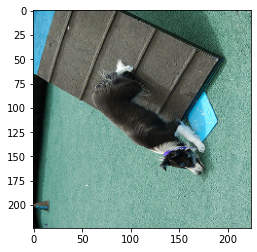

In [122]:
for i in range(1):
    
    sample = test_Dataset[0]
    
    image = sample['image']
    caption = sample['caption']
        
    plt.imshow(image.permute(1, 2, 0))
    
    print(image.shape)
    org_image = image.clone()
        
    yimage = image.float()
    
    print(i, sample['image'].size(), sample['caption'].size()) 


In [123]:
org_image, image2, caption = net_sample_output()

<class 'torch.Tensor'>


In [124]:
org_image.shape

torch.Size([1, 3, 224, 224])

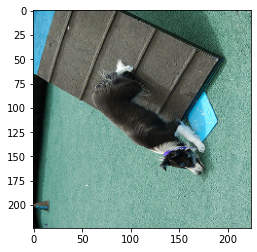

In [125]:
plt.imshow(image.permute(1, 2, 0))

In [126]:
#image = image.to(device)

# Obtain the embedded image features.
features = encoder(image2).unsqueeze(1)

# Pass the embedded image features through the model to get a predicted caption.
output = decoder.sample(features)
print('example output:', output)

assert (type(output)==list), "Output needs to be a Python list" 
assert all([type(x)==int for x in output]), "Output should be a list of integers." 
#assert all([x in idx2word for x in output]), "Each entry in the output needs to correspond to an integer that indicates a token in the vocabulary."

example output: [1, 3, 77, 5, 6, 113, 169, 9, 149, 40, 6, 172, 2, 2, 2, 2, 2, 2, 2, 0]


In [127]:
def clean_sentence(output):
    sentence = ""
    for i in range(len(output)):
        sentence += " "
        if output[i] == 1:
            sentence += '<start>'
        elif output[i] == 0:
            sentence += '<end>'
        elif output[i] == 2:
            sentence += '<pad>'
        else:
            sentence += idx2word[output[i]]
            
    #sentence = [x in data_loader.dataset.vocab.idx2word for x in output]
    return sentence

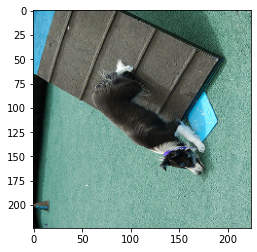

In [128]:
plt.imshow(image.permute(1, 2, 0))

In [129]:
sentence = clean_sentence(output)
print('example sentence:', sentence)

assert type(sentence)==str, 'Sentence needs to be a Python string!'

example sentence:  <start> A man in a red shirt is standing on a rock <pad> <pad> <pad> <pad> <pad> <pad> <pad> <end>
